In [ ]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import collections
import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
path='/content/drive/MyDrive/PA_DATA/BSE_&_NSE_Stocks_Trading_Data_20_years.txt'
file1=pd.read_csv(path,sep="|")
file1['co_stkdate'] = pd.to_datetime(file1.co_stkdate)

In [ ]:
start_date='2010-03-31'
end_date='2020-09-30'
#start_date='2017-01-01'
#end_date='2017-12-30'
df=file1.loc[file1['company_name'] == 'RELIANCE INDUSTRIES LTD.']
df=df.sort_values(by=['co_stkdate'])
#mask = (df['co_stkdate'] > start_date) & (df['co_stkdate'] <= end_date)
#df=df[mask]

In [ ]:
df.shape

(2571, 21)

<Figure size 6x4 with 0 Axes>

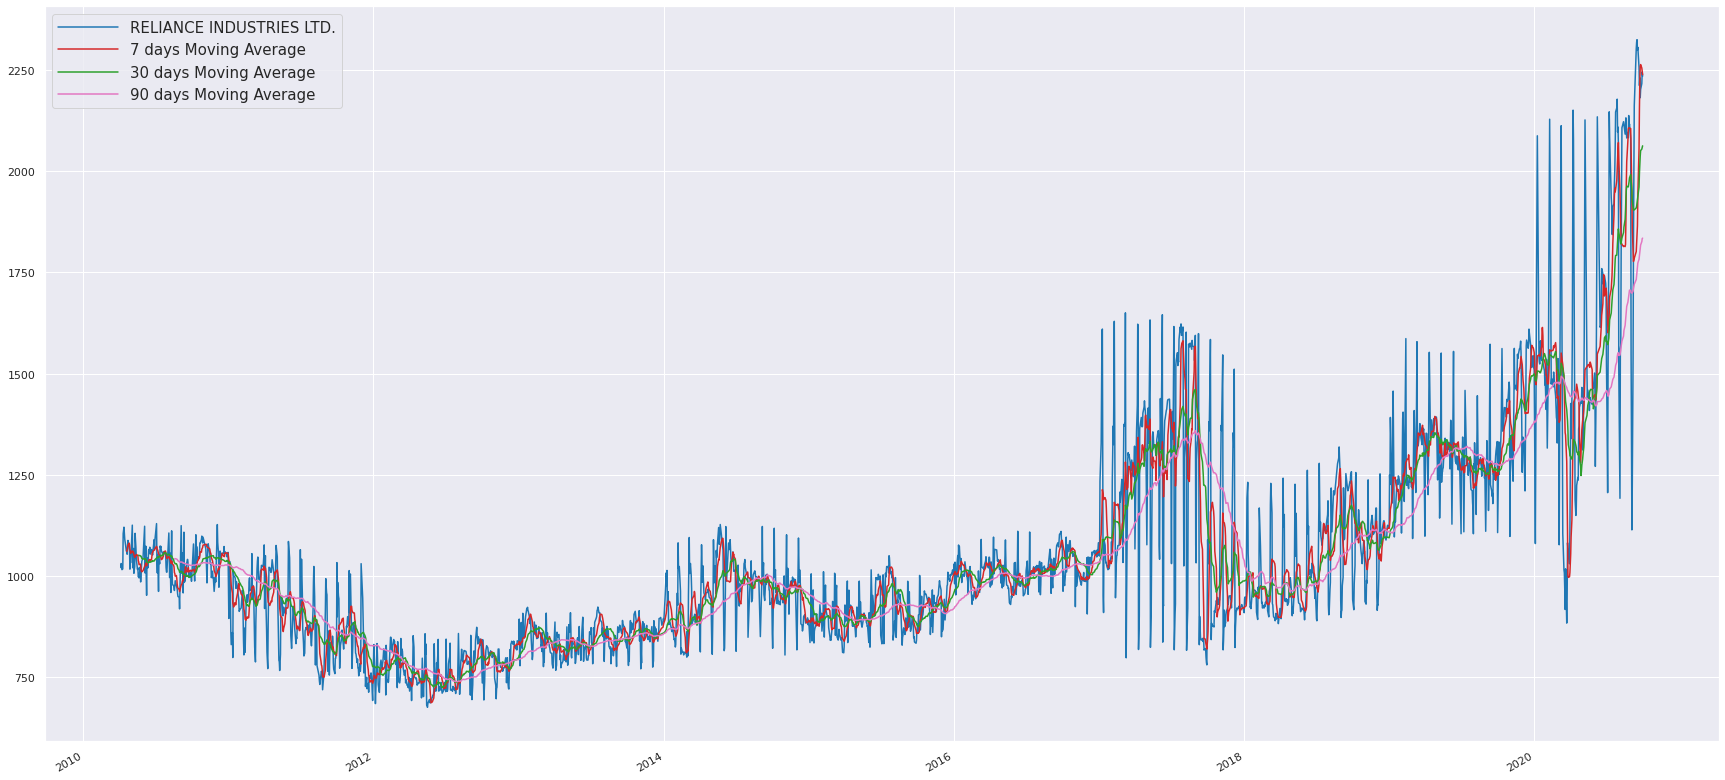

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=1, facecolor='w', edgecolor='k')
params = {'legend.fontsize': 15,
          'legend.handlelength': 4}
plt.rcParams.update(params)
MA7_data = df.nse_closing_price.rolling(window=10).mean()
MA30_data = df.nse_closing_price.rolling(window=30).mean()
MA90_data = df.nse_closing_price.rolling(window=90).mean()

fig, ax = plt.subplots(figsize=(30,15))
fig.autofmt_xdate()
a=df['co_stkdate']
plt.plot(a, df.nse_closing_price, label='RELIANCE INDUSTRIES LTD.', color='tab:blue')
ax.plot(a, MA7_data, label='7 days Moving Average', color='tab:red')
ax.plot(a, MA30_data, label='30 days Moving Average', color='tab:green')
ax.plot(a, MA90_data, label='90 days Moving Average', color='tab:pink')
ax.legend()

In [ ]:
df["first_diff"]= df.nse_closing_price -  df.nse_closing_price.shift(1)
df=df.dropna(inplace=False)

(array([1253.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1317.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

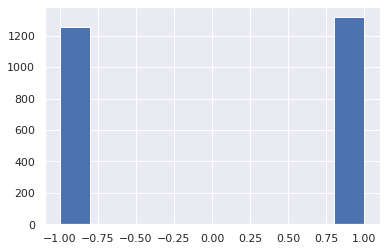

In [ ]:
y = np.sign(df["first_diff"])
y[y == 0] = 1
plt.hist(y)

In [ ]:
df["Closing_Direction"] = y 

In [ ]:
def feat_corr_analysis(corrmat):
    f, ax = plt.subplots(figsize =(9, 8)) 
    #1 Heatmap
    sns.heatmap(corrmat, vmin=0, vmax=1, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
    plt.title("Heatmap - Correlation between data variables")
    
    #2 Correlation Values and Features
    correlations = corrmat.abs().unstack().sort_values(kind="quicksort").reset_index()
    correlations = correlations[correlations['level_0'] != correlations['level_1']]
    Clos_dir_corr = corrmat['Closing_Direction']
    Clos_dir_corr = df_temp_corr['Closing_Direction'].drop(['Closing_Direction'], axis =0)
    Clos_dir_corr = Clos_dir_corr.sort_values(ascending = False)  
    
    #Plot with different colours for better visualisation
    clist = [(0, "red"), (0.125, "orange"), (0.25, "green"), (0.5, "blue"), 
             (0.7, "green"), (0.75, "orange"), (1, "red")]
    rvb = mcolors.LinearSegmentedColormap.from_list("", clist)    
    N = Clos_dir_corr.shape[0]
    Col_range = np.arange(N).astype(float)
    #Create Bar Plot
    plt.figure(figsize=(15,10))
    plt.bar(Clos_dir_corr.index, Clos_dir_corr[:],color=rvb(Col_range/N))
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.xticks(fontsize=8,rotation=90)
    plt.title('Feature Correlation for Closing Direction')
    plt.show()
    return 

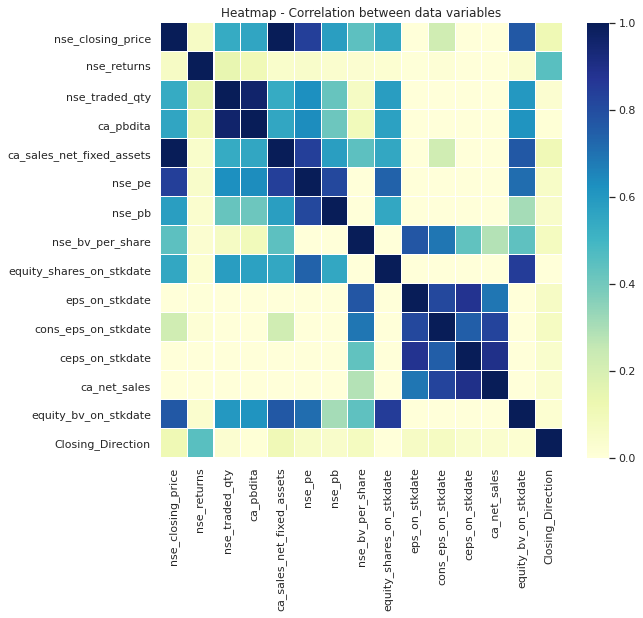

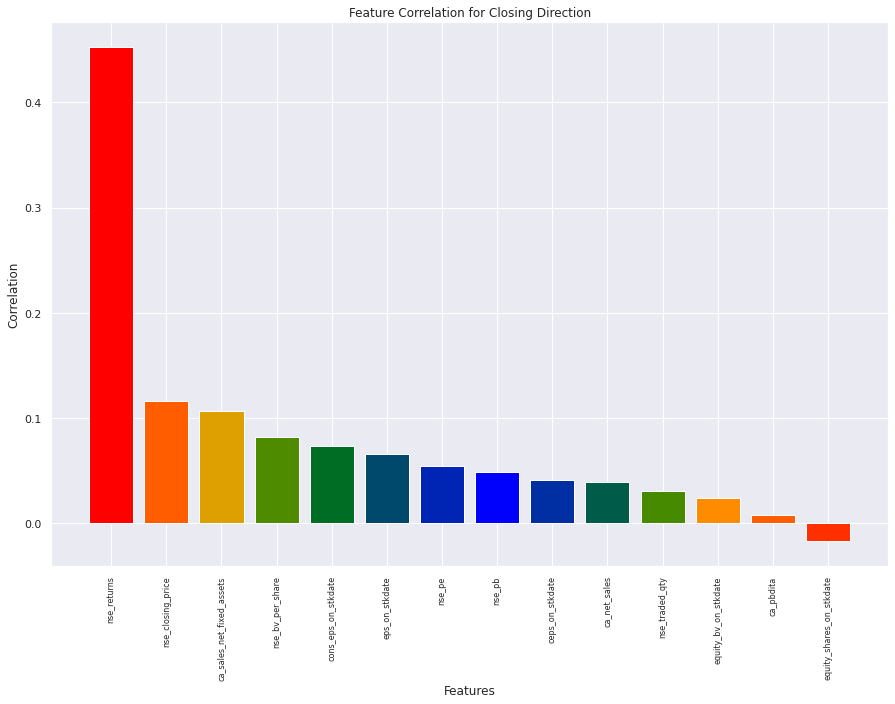

In [ ]:
df_temp =df
df_temp = df_temp.rename({'nse_no_of_trans': 'ca_pbdita', 'nse_avg_rate': 'ca_sales_net_fixed_assets',
                          'cons_ceps_on_stkdate' : 'ca_net_sales'}, axis=1)
df_temp=df_temp.drop(columns=['co_code', 'first_diff','equity_facevalue_on_stkdate','nse_opening_price',
                              'nse_high_price','nse_low_price'])
df_temp_corr = df_temp.corr()
feat_corr_analysis(df_temp_corr)

In [ ]:
correlated_features = set()
for i in range(len(df_temp_corr.columns)):
    for j in range(i):
        if abs(df_temp_corr.iloc[i, j]) > 0.88:
            colname = df_temp_corr.columns[i]
            correlated_features.add(colname)

In [ ]:
df_temp_corr

,nse_closing_price,nse_returns,nse_traded_qty,ca_pbdita,ca_sales_net_fixed_assets,nse_pe,nse_pb,nse_bv_per_share,equity_shares_on_stkdate,eps_on_stkdate,cons_eps_on_stkdate,ceps_on_stkdate,ca_net_sales,equity_bv_on_stkdate,Closing_Direction
nse_closing_price,1.000000,0.066213,0.536977,0.555210,0.999607,0.842204,0.579519,0.443978,0.548664,-0.048624,0.220888,-0.293380,-0.154963,0.768319,0.116070
nse_returns,0.066213,1.000000,0.143334,0.108194,0.046192,0.047752,0.038466,0.029769,0.026315,0.004739,0.013438,-0.015005,-0.013101,0.038170,0.452478
nse_traded_qty,0.536977,0.143334,1.000000,0.958383,0.535696,0.625733,0.425149,0.066469,0.585071,-0.336334,-0.177874,-0.480364,-0.386219,0.599888,0.030389
ca_pbdita,0.555210,0.108194,0.958383,1.000000,0.554622,0.634639,0.412530,0.096768,0.572600,-0.324704,-0.152253,-0.468006,-0.364656,0.616021,0.008153
ca_sales_net_fixed_assets,0.999607,0.046192,0.535696,0.554622,1.000000,0.841982,0.579182,0.443959,0.548213,-0.048570,0.221235,-0.293129,-0.154477,0.767996,0.106603
nse_pe,0.842204,0.047752,0.625733,0.634639,0.841982,1.000000,0.814158,-0.029768,0.740209,-0.562679,-0.253992,-0.698422,-0.490740,0.711473,0.054910
nse_pb,0.579519,0.038466,0.425149,0.412530,0.579182,0.814158,1.000000,-0.445927,0.548674,-0.671790,-0.274914,-0.601195,-0.288721,0.308935,0.048468
nse_bv_per_share,0.443978,0.029769,0.066469,0.096768,0.443959,-0.029768,-0.445927,1.000000,-0.072694,0.770925,0.690581,0.434023,0.281731,0.440588,0.081726
equity_shares_on_stkdate,0.548664,0.026315,0.585071,0.572600,0.548213,0.740209,0.548674,-0.072694,1.000000,-0.577031,-0.509441,-0.850337,-0.833314,0.851126,-0.017024
eps_on_stkdate,-0.048624,0.004739,-0.336334,-0.324704,-0.048570,-0.562679,-0.671790,0.770925,-0.577031,1.000000,0.816324,0.879935,0.689718,-0.161376,0.066207


In [ ]:
correlated_features

{'ca_net_sales', 'ca_pbdita', 'ca_sales_net_fixed_assets'}

In [ ]:
num_attributes=['nse_closing_price','nse_returns','nse_traded_qty','ca_pbdita','nse_pe','ca_sales_net_fixed_assets',
                'nse_pb','nse_bv_per_share','equity_shares_on_stkdate','eps_on_stkdate','cons_eps_on_stkdate',
                'ceps_on_stkdate','ca_net_sales','equity_bv_on_stkdate']
#for col in df_temp.columns: 
#    print(col)                 


In [ ]:
for each in num_attributes:
  if each in correlated_features:
    num_attributes.remove(each)

In [ ]:
num_attributes

['nse_closing_price',
 'nse_returns',
 'nse_traded_qty',
 'nse_pe',
 'nse_pb',
 'nse_bv_per_share',
 'equity_shares_on_stkdate',
 'eps_on_stkdate',
 'cons_eps_on_stkdate',
 'ceps_on_stkdate',
 'equity_bv_on_stkdate']

In [ ]:
start_date='2018-03-31'
mask2 = (df_temp['co_stkdate'] > start_date) 
D_test=df_temp[mask2]
mask3=(df_temp['co_stkdate'] <= start_date)
D_train=df_temp[mask3]

In [ ]:
y_train=D_train['Closing_Direction'].copy()
X_train=D_train.drop('Closing_Direction',axis=1)
y_test=D_test['Closing_Direction'].copy()
X_test=D_test.drop('Closing_Direction',axis=1)

In [ ]:
X_train=X_train[num_attributes]
X_test=X_test[num_attributes]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.54      0.41      0.47       307
         1.0       0.53      0.65      0.59       316

    accuracy                           0.53       623
   macro avg       0.53      0.53      0.53       623
weighted avg       0.53      0.53      0.53       623



In [ ]:
coefficients = pd.concat([pd.DataFrame(X_test.columns),pd.DataFrame(np.transpose(logmodel.coef_))], axis = 1)

In [ ]:
print(coefficients)

                           0             0
0          nse_closing_price  1.614227e-11
1                nse_returns  6.704757e-15
2             nse_traded_qty  6.042552e-08
3                     nse_pe  1.200866e-13
4                     nse_pb  9.418246e-15
5           nse_bv_per_share  8.363190e-12
6   equity_shares_on_stkdate -8.602958e-11
7             eps_on_stkdate  7.619678e-13
8        cons_eps_on_stkdate  6.600320e-13
9            ceps_on_stkdate  7.241046e-13
10      equity_bv_on_stkdate  2.247643e-08


In [ ]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler() #adad ro beine sefr o yek mikone
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,11)
y_train = y_scaler.fit_transform(y_train)
X_train = x_scaler.fit_transform(X_train)

y_test = np.array(y_test).reshape(-1,1)
X_test = x_scaler.fit_transform(X_test)
y_test = y_scaler.fit_transform(y_test)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn import metrics

In [ ]:
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs=500,batch_size=32,validation_split=0.2,verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
Y_PREDICT = model.predict(X_test, batch_size=32)
print(score)

In [ ]:
Y_PREDICT = [1 if x > 0.5 else 0 for x in Y_PREDICT]
matrix = metrics.confusion_matrix(y_test, Y_PREDICT)
recall = matrix[0][0]/(matrix[0][0]+matrix[1][0])
precision = matrix[0][0]/(matrix[0][0]+matrix[0][1])
print('Test loss:', score[0])
print('Test total recall:', recall)
print('Test total precision:', precision)
print('Test total accuracy :', score[1])

In [ ]:
df_lag=df
df_lag['Percentage Return'] = df_lag['nse_closing_price'].pct_change()
df_lag.tail()

In [ ]:
maxValues = df_lag.min()  
#nse_traded_qty                              6.52309e+07 equity_bv_on_stkdate                        1.28366e+06 
#equity_shares_on_stkdate                    3.22848e+09 nse_no_of_trans                             1.28553e+06
  
print(maxValues) 
# Converting Volume in millions
df_lag['nse_traded_qty']=df_lag['nse_traded_qty']/10000
df_lag['equity_bv_on_stkdate']=df_lag['equity_bv_on_stkdate']/1000000
df_lag['equity_shares_on_stkdate']=df_lag['equity_shares_on_stkdate']/1000000